# Linear Regression Models

In [2]:
import sys
sys.path.insert(0, r'R:\Dropbox\Python\CatAna')
import pandas as pd
%matplotlib inline

In [3]:
from catana.datasets import Datasets

In [4]:
d = Datasets()
g = d.get('galaxy')

In [5]:
g.info

Radial Velocity of Galaxy NGC7531

SUMMARY:
       The galaxy data frame records the  radial  velocity  of  a
       spiral  galaxy  measured  at 323 points in the area of sky
       which it covers.  All the measurements  lie  within  seven
       slots  crossing at the origin.  The positions of the meas-
       urements given by four variables (columns).

DATA DESCRIPTION:
east.west:     the east-west coordinate.  The origin,  (0,0),  is
       near  the  center of the galaxy, east is negative, west is
       positive.
north.south:   the north-south coordinate.  The origin, (0,0), is
       near the center of the galaxy, south is negative, north is
       positive.
angle:    degrees of counter-clockwise rotation from the horizon-
       tal of the slot within which the observation lies.
radial.position:    signed  distance  from  origin;  negative  if
       east-west coordinate is negative.
velocity:   radial velocity measured in km/sec.

SOURCE:
       Buta, R. (1987)  The  Structu

In [6]:
df = g.data

# 0. Describe data
df.describe()

,row.names,east.west,north.south,angle,radial.position,velocity
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,218.647059,-0.332369,1.521089,80.890093,-0.842724,1593.625387
std,122.410416,12.027505,22.887763,38.244305,25.888799,94.268114
min,3.000000,-29.666929,-49.107689,12.500000,-52.400002,1409.000000
25%,114.500000,-7.916875,-13.554341,63.500000,-21.350000,1523.000000
50%,231.000000,-0.064932,0.670963,92.500000,-0.800000,1586.000000
75%,320.500000,6.950529,18.013731,102.500000,19.650000,1669.000000
max,417.000000,29.484140,49.888725,133.000000,55.699999,1775.000000


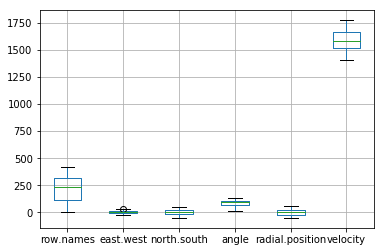

In [7]:
# 1. BoxPlot
df.boxplot();

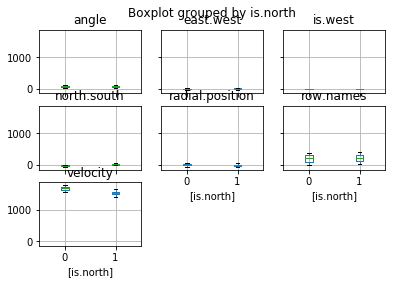

In [8]:
# 1.1 BoxPlot by group - Shows distribution by classification
df['is.north'] = df['north.south'].apply(lambda x: 1 if x > 0 else 0)
df['is.west'] = df['east.west'].apply(lambda x: 1 if x > 0 else 0)
df.boxplot(by='is.north');

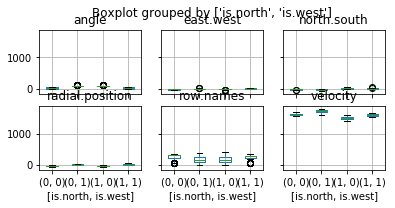

In [9]:
df.boxplot(by=['is.north', 'is.west'], layout=(3,3));

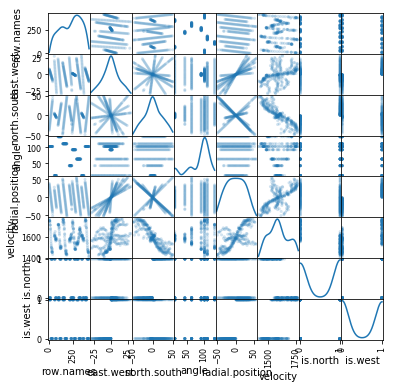

In [10]:
# 2.1 Scatter matrix (KDE)
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde');

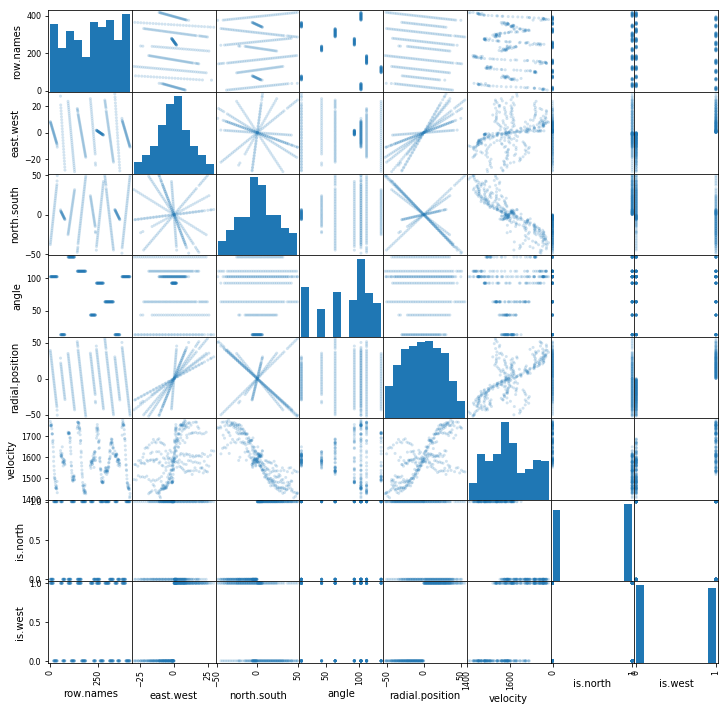

In [18]:
# 2.2 Scatter matrix (hist)
pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='hist');

In [12]:
# 3. Hist

# 4. KDE

## Example 3.2.1 Prostate Cancer

In [13]:
from catana.datasets import Datasets
d = Datasets()
p = d.get('prostate')
prostate = p.data

In [14]:
p.info

Prostate data info

Predictors (columns 1--8)

lcavol
lweight
age
lbph
svi
lcp
gleason
pgg45

outcome (column 9)

lpsa

train/test indicator (column 10)

This last column indicates which 67 observations were used as the 
"training set" and which 30 as the test set, as described on page 48
in the book.

There was an error in these data in the first edition of this
book. Subject 32 had a value of 6.1 for lweight, which translates to a
449 gm prostate! The correct value is 44.9 gm. We are grateful to
Prof. Stephen W. Link for alerting us to this error.

The features must first be scaled to have mean zero and  variance 96 (=n)
before the analyses in Tables 3.1 and beyond.  That is, if x is the  96 by 8 matrix
of features, we compute xp <- scale(x,TRUE,TRUE)




In [15]:
# 0. Describe
prostate.describe()

,Unnamed: 0,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


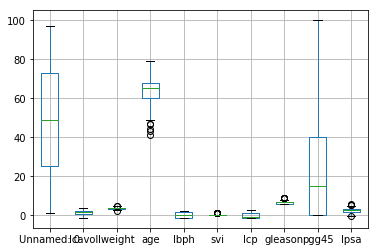

In [16]:
# 1. BoxPlot
prostate.boxplot();

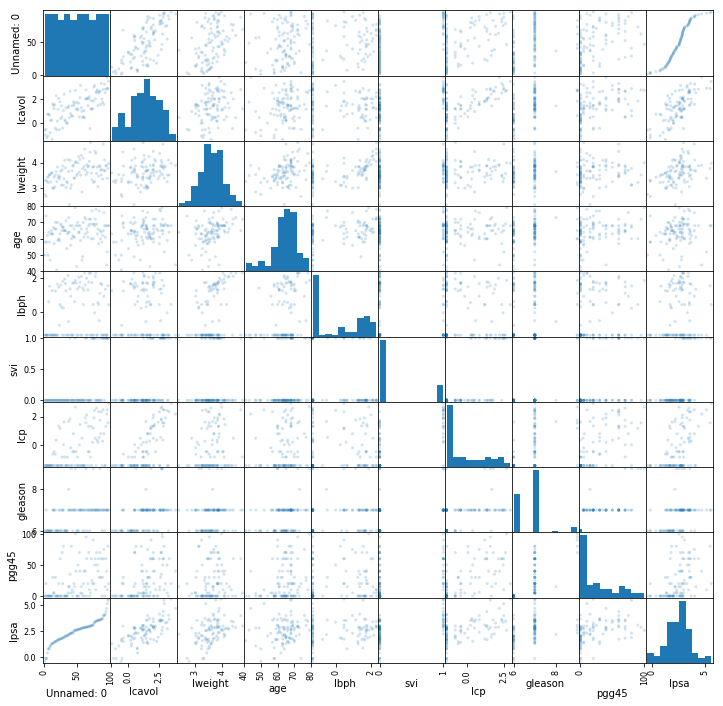

In [17]:
# 2.2 Scatter matrix (hist)
pd.plotting.scatter_matrix(prostate, alpha=0.2, figsize=(12, 12), diagonal='hist');